<a href="https://colab.research.google.com/github/k-chanez/Churn-prediction/blob/ck_dev/ml_ck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
# Set the path to your service account key file on the GCE VM
key_path = "/projet-m2-ia-churn-prediction-db53d6498522.json"

# Set the environment variable for authentication
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = key_path

In [ ]:
from google.cloud import bigquery

# 'project_id' est l'ID de  projet GCP
project_id = 'projet-m2-ia-churn-prediction'

# Exécutez une requête BigQuery pour lire toute la table ecommerce
query = """
SELECT *
FROM `projet-m2-ia-churn-prediction.Ecommerce_Churn.Ecommerce_Table1`"""
df = bigquery.Client(project=project_id).query(query).to_dataframe()

# Affichez le résultat
df.head(10)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,NaN,1.0,0.0,278.75
1,50929,0,50.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00
2,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.00
3,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
4,51851,0,0.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,3,Mobile Phone,1,Married,2,1,13.0,0.0,1.0,2.0,56.00
5,50177,0,0.0,Mobile Phone,3,16.0,Credit Card,Female,3.0,4,Mobile Phone,3,Single,2,0,12.0,1.0,1.0,0.0,112.00
6,50346,0,0.0,Computer,3,NaN,Credit Card,Male,2.0,3,Mobile,2,Divorced,1,0,13.0,0.0,2.0,1.0,124.00
7,51816,0,0.0,Computer,3,NaN,Credit Card,Male,2.0,3,Mobile,1,Married,1,0,13.0,1.0,2.0,1.0,124.00
8,50521,1,0.0,Mobile Phone,3,6.0,Credit Card,Female,NaN,4,Mobile,3,Married,7,1,19.0,0.0,1.0,2.0,128.00
9,51991,1,0.0,Mobile Phone,3,6.0,Credit Card,Female,NaN,4,Mobile,3,Married,7,1,19.0,1.0,1.0,2.0,128.00


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd

# Exemple pour charger un fichier CSV
file_path =  '/content/drive/My Drive/dataset.xlsx'
df = pd.read_excel(file_path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [52]:
print(df.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
print(df['OrderAmountHikeFromlastYear'].isna())

0       False
1       False
2       False
3        True
4       False
        ...  
5054    False
5055    False
5056    False
5057    False
5058    False
Name: OrderAmountHikeFromlastYear, Length: 5059, dtype: bool


In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,NaN,1.0,0.0,278.75
1,50929,0,50.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00
2,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.00
3,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
4,51851,0,0.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,3,Mobile Phone,1,Married,2,1,13.0,0.0,1.0,2.0,56.00


**Statistiques descriptives afin de voir la distribution des données de dataset (mean, min, max, count)**

In [53]:
print(df.describe())
print(df['Gender'].describe())
print(df['PreferredLoginDevice'].describe())
print(df['MaritalStatus'].describe())
print(df['PreferredPaymentMode'].describe())


         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

In [ ]:
df.dtypes

CustomerID                       Int64
Churn                            Int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         Int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         Int64
PreferedOrderCat                object
SatisfactionScore                Int64
MaritalStatus                   object
NumberOfAddress                  Int64
Complain                         Int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

**traitement des variables catégorielles**

In [54]:
# variables catégorielles :
df.PreferredLoginDevice = df.PreferredLoginDevice.astype('category')
df.PreferredPaymentMode = df.PreferredPaymentMode.astype('category')
df.Gender = df.Gender.astype("category")
df.MaritalStatus = df.MaritalStatus.astype("category")
df.PreferedOrderCat = df.PreferedOrderCat.astype("category")

In [55]:
type_device = df['PreferredLoginDevice'].cat.categories
mode_paiement = df['PreferredPaymentMode'].cat.categories
sexe = df['Gender'].cat.categories
status_familial = df['MaritalStatus'].cat.categories
order_count = df['PreferedOrderCat'].cat.categories

In [56]:
print("Type des equipement",type_device)
print("Mode de paiement",mode_paiement)
print("Genre",sexe)
print("Status familial",status_familial)
print("Count de commandes",order_count)

Type des equipement Index(['Computer', 'Mobile Phone', 'Phone'], dtype='object')
Mode de paiement Index(['CC', 'COD', 'Cash on Delivery', 'Credit Card', 'Debit Card',
       'E wallet', 'UPI'],
      dtype='object')
Genre Index(['Female', 'Male'], dtype='object')
Status familial Index(['Divorced', 'Married', 'Single'], dtype='object')
Count de commandes Index(['Fashion', 'Grocery', 'Laptop & Accessory', 'Mobile', 'Mobile Phone',
       'Others'],
      dtype='object')


**Traitement des valeurs manquantes**

In [58]:
df.fillna(method='ffill', inplace=True)

In [59]:
df.fillna(method='bfill', inplace=True)

In [57]:
# Remplacer les valeurs manquantes par la moyenne de la colonne
df['OrderCount'].fillna(df['OrderCount'].mean(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'], inplace=True)


In [60]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,4.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,4.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.009757,0.033040,-0.028978,0.057158,0.598511,0.403343,-0.029938,0.154216,-0.012397,0.119925,0.214308,0.110958,0.086872,0.164010
Churn,-0.009757,1.000000,-0.353464,0.076868,0.079955,0.025816,0.108807,0.095326,0.041043,0.245175,0.004985,-0.012801,-0.033679,-0.149229,-0.153990
Tenure,0.033040,-0.353464,1.000000,-0.059135,-0.017870,-0.024301,-0.026076,-0.008206,0.237976,-0.024675,0.003881,0.135406,0.191010,0.184552,0.489907
CityTier,-0.028978,0.076868,-0.059135,1.000000,0.013518,-0.035367,0.005067,-0.004347,-0.037998,-0.009615,-0.031096,0.004643,0.018352,0.011136,0.031596
WarehouseToHome,0.057158,0.079955,-0.017870,0.013518,1.000000,0.059296,0.016765,0.001554,-0.011959,0.026593,0.038192,-0.007485,-0.001721,0.010511,-0.021387
HourSpendOnApp,0.598511,0.025816,-0.024301,-0.035367,0.059296,1.000000,0.310995,0.034411,0.138903,0.006368,0.109459,0.178313,0.091402,0.054477,0.074888
NumberOfDeviceRegistered,0.403343,0.108807,-0.026076,0.005067,0.016765,0.310995,1.000000,-0.021766,0.078833,0.004426,0.073650,0.136408,0.083526,0.009353,0.102078
SatisfactionScore,-0.029938,0.095326,-0.008206,-0.004347,0.001554,0.034411,-0.021766,1.000000,0.058941,-0.043215,-0.034997,0.030152,0.032394,0.037187,0.013432
NumberOfAddress,0.154216,0.041043,0.237976,-0.037998,-0.011959,0.138903,0.078833,0.058941,1.000000,-0.032578,0.007232,0.031347,-0.022647,-0.083600,0.169953
Complain,-0.012397,0.245175,-0.024675,-0.009615,0.026593,0.006368,0.004426,-0.043215,-0.032578,1.000000,-0.009613,-0.004438,-0.019932,-0.051588,-0.000647


**D'apres la matrice de corrélation qui est faite par la méthode de pearson on remarque que :**

 *   Variables fortement corrélées :
     Certains coefficients de corrélation sont proches de 1, indiquant une forte corrélation positive.
     Par exemple, la corrélation entre "HourSpendOnApp" et "NumberOfDeviceRegistered" est d'environ 0.31.
     La corrélation entre "CouponUsed" et "OrderCount" est d'environ 0.74, ce qui suggère une forte corrélation positive entre ces deux variables.

*  Variables corrélées négativement : Certains coefficients de corrélation sont proches de -1, indiquant une forte corrélation négative.
Par exemple, la corrélation entre "Churn" (la résiliation) et "Tenure" (la durée) est d'environ -0.35, suggérant une corrélation négative entre la durée du client et la résiliation.

*  Variables faiblement corrélées : Certains coefficients de corrélation sont proches de 0, indiquant une faible corrélation linéaire.
Par exemple, la corrélation entre "Churn" et "DaySinceLastOrder" est d'environ -0.15, ce qui suggère une corrélation relativement faible.

*  Variables peu corrélées : Certains coefficients de corrélation sont proches de zéro, indiquant une corrélation très faible ou nulle.
Par exemple, la corrélation entre "CityTier" et "WarehouseToHome" est d'environ 0.013, indiquant une corrélation très faible.

In [ ]:
print(df.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


**Encodage des données catégorielles**

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding pour plusieurs colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=['PreferredPaymentMode', 'Gender', 'MaritalStatus', 'PreferedOrderCat','PreferredLoginDevice'])

# Afficher le DataFrame résultant
print(df_encoded)


      CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0          50001      1     4.0         3              6.0        3.000000   
1          50002      1     4.0         1              8.0        3.000000   
2          50003      1     4.0         1             30.0        2.000000   
3          50004      1     0.0         3             15.0        2.000000   
4          50005      1     0.0         1             12.0        2.931535   
...          ...    ...     ...       ...              ...             ...   
5625       55626      0    10.0         1             30.0        3.000000   
5626       55627      0    13.0         1             13.0        3.000000   
5627       55628      0     1.0         1             11.0        3.000000   
5628       55629      0    23.0         3              9.0        4.000000   
5629       55630      0     8.0         1             15.0        3.000000   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddr

In [62]:
df_encoded.head(5)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,MaritalStatus_Single,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone
0,50001,1,4.0,3,6.0,3.000000,3,2,9,1,...,1,0,0,1,0,0,0,0,1,0
1,50002,1,4.0,1,8.0,3.000000,4,3,7,1,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,4.0,1,30.0,2.000000,4,3,6,1,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,2.000000,4,5,8,0,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,2.931535,3,5,3,0,...,1,0,0,0,1,0,0,0,0,1


In [63]:
df_encoded.dtypes

CustomerID                                 int64
Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredPaymentMode_CC                    uint8
PreferredPaymentMode_COD                   uint8
PreferredPaymentMode_Cash on Delivery      uint8
PreferredPaymentMode_Credit Card           uint8
PreferredPaymentMode_Debit Card            uint8
PreferredPaymentMode

 **Ensemble d'entraînement et un ensemble de test**

In [64]:
from sklearn.model_selection import train_test_split
# Divisez les données en ensembles d'entraînement et de test
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']
# X représente les caractéristiques (variables indépendantes), y représente la variable cible (churn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Entrainement de RandomForestClassifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Créez le modèle
model = RandomForestClassifier(n_estimators=200, random_state=42,max_depth =  20)

# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [71]:
from sklearn.metrics import accuracy_score, classification_report

# Faites des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluez la précision du modèle
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Affichez le rapport de classification pour une évaluation plus détaillée
print(classification_report(y_test, predictions))


Accuracy: 0.9618117229129662
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.99      0.77      0.87       185

    accuracy                           0.96      1126
   macro avg       0.98      0.89      0.92      1126
weighted avg       0.96      0.96      0.96      1126



**GridSearch pour identifier les hyper parameters**

In [72]:
from sklearn.model_selection import GridSearchCV

#  la grille des hyperparamètres à rechercher
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# recherche sur la grille avec validation croisée
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

#  les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Utilisation de modèle avec les meilleurs paramètres pour faire des prédictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


Meilleurs paramètres: {'max_depth': 20, 'n_estimators': 200}


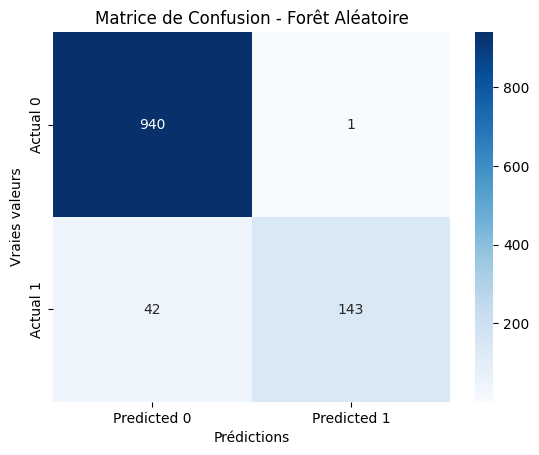

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion - Forêt Aléatoire')
plt.show()


* 940 Vrais Négatifs (True Negatives - TN) : Ces clients ont été correctement classés comme non churn (0).

* 1 Faux Positif (False Positive - FP) : Ces clients ont été incorrectement classés comme churn (1) alors qu'ils ne l'étaient pas réellement.

* 42 Faux Négatifs (False Negatives - FN) : Ces clients ont été incorrectement classés comme non churn (0) alors qu'ils l'étaient réellement.

* 143 Vrais Positifs (True Positives - TP) : Ces clients ont été correctement classés comme churn (1).

**Logistic Regression**

In [80]:
from sklearn.linear_model import LogisticRegression

# Création du modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)

# Entraînement du modèle
logistic_model.fit(X_train, y_train)

# Prédictions
logistic_predictions = logistic_model.predict(X_test)

# Matrice de confusion
conf_matrix_logistic = confusion_matrix(y_test, logistic_predictions)
# Calcul de la précision
accuracy_logistic = accuracy_score(y_test, logistic_predictions)
print("Régression Logistique - Accuracy:", accuracy_logistic)

# Rapport de classification
print("Régression Logistique - Classification Report:")
print(classification_report(y_test, logistic_predictions))

Régression Logistique - Accuracy: 0.8401420959147424
Régression Logistique - Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       941
           1       1.00      0.03      0.05       185

    accuracy                           0.84      1126
   macro avg       0.92      0.51      0.48      1126
weighted avg       0.87      0.84      0.77      1126



In [77]:
conf_matrix_logistic

array([[941,   0],
       [180,   5]])

**SVM (Support Vector Machine)**

In [84]:
from sklearn.svm import SVC

# Création du modèle SVM
svm_model = SVC(random_state=42)

# Entraînement du modèle
svm_model.fit(X_train, y_train)

# Prédictions
predictions_svm = svm_model.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
# Calcul de la précision
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("SVM - Accuracy:", accuracy_svm)

# Rapport de classification
print("SVM - Classification Report:")
print(classification_report(y_test, predictions_svm))


SVM - Accuracy: 0.8357015985790408
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       941
           1       0.00      0.00      0.00       185

    accuracy                           0.84      1126
   macro avg       0.42      0.50      0.46      1126
weighted avg       0.70      0.84      0.76      1126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
conf_matrix_svm

array([[941,   0],
       [185,   0]])

**k-NN (k-Nearest Neighbors)**

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Création du modèle k-NN
knn_model = KNeighborsClassifier()

# Entraînement du modèle
knn_model.fit(X_train, y_train)

# Prédictions
knn_predictions = knn_model.predict(X_test)

# Matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)

# Calcul de la précision
accuracy_knn = accuracy_score(y_test, knn_predictions)
print("k-NN - Accuracy:", accuracy_knn)

# Rapport de classification
print("k-NN - Classification Report:")
print(classification_report(y_test, knn_predictions))

k-NN - Accuracy: 0.8170515097690941
k-NN - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       941
           1       0.29      0.08      0.13       185

    accuracy                           0.82      1126
   macro avg       0.57      0.52      0.51      1126
weighted avg       0.75      0.82      0.77      1126



In [79]:
conf_matrix_knn

array([[905,  36],
       [170,  15]])

**Enregistrement de meilleur Modele afin de l'utiliser sur streamlit**

In [90]:
import joblib

# Enregistrez le modèle
joblib.dump(model, 'meilleur_modele_churn_prediction.joblib')


['meilleur_modele_churn_prediction.joblib']

In [92]:
from google.colab import files
files.download('meilleur_modele_churn_prediction.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>